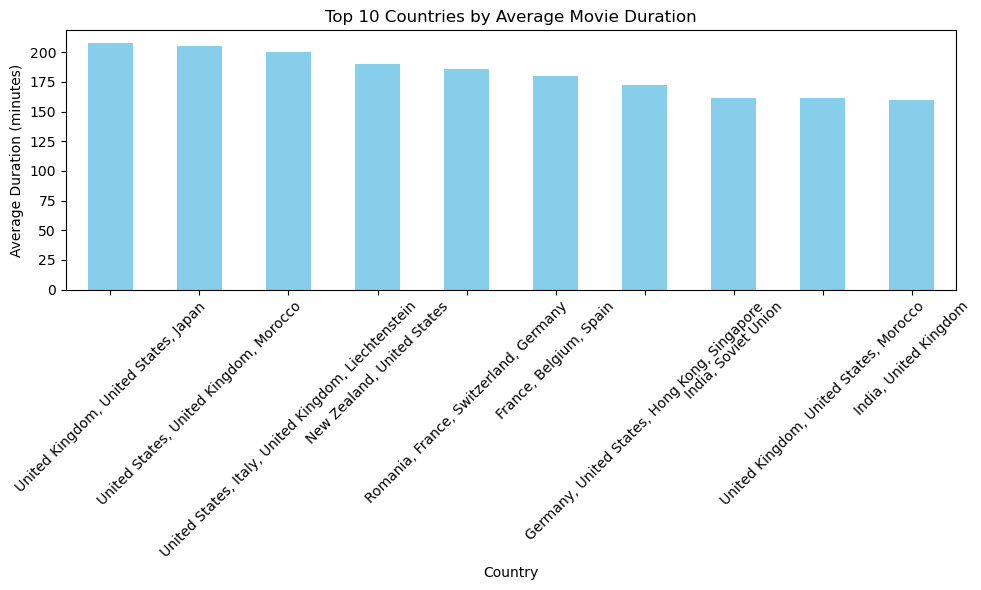

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv('/home/student/msc-74/netflix_titles.csv')

# Filter only movies and make a copy
movies = df[df['type'] == 'Movie'].copy()

# Clean and convert 'duration' column
movies['duration'] = movies['duration'].str.replace(' min', '', regex=False)
movies = movies[pd.to_numeric(movies['duration'], errors='coerce').notnull()]
movies['duration'] = movies['duration'].astype(float)

# Drop rows where 'country' is missing
movies = movies.dropna(subset=['country'])

# Compute average duration by country
avg_duration = movies.groupby('country')['duration'].mean().sort_values(ascending=False).head(10)

# Plot
avg_duration.plot(kind='bar', figsize=(10,6), color='skyblue')
plt.xlabel('Country')
plt.ylabel('Average Duration (minutes)')
plt.title('Top 10 Countries by Average Movie Duration')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
